![](imagenes/UC_FMRI.jpg)

---

---

***Andres Eduardo Aracena Rangel***

*Estudiante del programa del Magister en Física Médica*

---

---

El siguiente Script de Python forma parte del trabajo especial de grado.

Profesor Guía:

*PhD María Daniela Cornejo*

---

---

Imagenes de fMRI extraidas de OpenNeuro:

- [ds001454](https://openneuro.org/datasets/ds001454/versions/1.3.1)
- [ds002422](https://openneuro.org/datasets/ds002422/versions/1.1.0)
- [ds004101](https://openneuro.org/datasets/ds004101/versions/1.0.1)

---

---

&nbsp;
Con referencia:

- [Pagina oficial Nibabel](https://nipy.org/nibabel/index.html) 
- [Pagina oficial JSON](https://www.json.org/)

Adquisisción de cortes:

- Poldrack, R. A., Mumford, J. A., and Nichols, T. E. (2011). Handbook of functional MRI data analysis. Cambridge University Press.

---

---

Imágenes realizadas por el autor del script, con apoyo de imagen 3D de corte sagital del cerebro del programa Microsoft PowerPoint.

---

---


 # Ejecución de la  función 'order_slice' para diversas imágenes

# Importamos librerias


In [1]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [2]:
import os # Módulo que permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Método que concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)

from IPython.display import Image, display #IPython proporciona una rica arquitectura para la computación interactiva

import pandas as pd # librería especializada en el manejo y análisis de estructuras de datos.
import json # Módulo para trabajar con datos JSON

# Definimos Parametros 

In [3]:
'''
Ruta del directorio de la data
'''
path_data = '/home/aracena/data/'

'''
Ruta donde reposa los archivos '.json' de la imagen funcional de los diferentes estudios
'''
# Estudio ds001454
path_json_1 = opj(path_data,'ds001454','sub-01','ses-1','func')
json_arch_ds001454 = opj(path_json_1, 'sub-01_ses-1_task-rest_run-01_bold.json')

# Estudio ds002422
path_json_2 = opj(path_data,'ds002422','sub-01','func')
json_arch_ds002422 = opj(path_json_2, 'sub-01_task-rest_bold.json')

# Estudio ds004101
path_json_3 = opj(path_data,'ds004101','sub-09114','ses-1pre','func')
json_arch_ds004101 = opj(path_json_3,'sub-09114_ses-1pre_task-rest_bold.json')

'''
Ruta donde reposan las imagenes de referencia de orden de adquisición de imagenes
'''
path_expe = '/home/aracena/thesis_ds004101/00_fase0_tips_nibabel_funciones/'
path_ref = opj(path_expe, '00_00_archivo_json_and_func_ordenslice','00_00_ejecucion_funcion','imagenes')

# Función 'order_slice'

In [4]:
'''
Funcion para extraer el orden de adquisión de los cortes de la imagen.

Inputs:

- json_arch: archivo '.json'

Output:

- slice_order: orden de adqusión de los cortes
- TR: tiempo de repetición
- number_of_slices: número de slices
- df_json: DF con la información del archivo '.json'
'''
 
def order_slice(json_arch):
    import json
    from IPython.display import Image, display
    import pandas as pd
    
    '''
    Cargamos el archivo '.json'
    '''
    with open(json_arch, 'rt') as fp:
        task_info = json.load(fp)
    
    '''
    Creamos una lista de las imágenes de referencia de adquisición de cortes
    '''
    lista_imagenes = [opj(path_ref,'SECUENCIAL_ASCENDENTE.png'),
                      opj(path_ref,'SECUENCIAL_DESCENDENTE.png'),
                      opj(path_ref,'INTERCALADO_PAR.png'),
                      opj(path_ref,'INTERCALADO_IMPAR.png')]

    '''
    Extraemos información del arhivo .json
    '''
    # tiempo de repeticion
    TR = task_info['RepetitionTime']
    # tiempo de adquisión de cortes
    slice_timing = task_info['SliceTiming']

    '''
    Procesamos data extraida del archivo .json
    '''
    # Número de slices
    number_of_slices = len(slice_timing)
    # Tiempo en adquirir primer corte
    time_first = TR/number_of_slices
    # Valor mínimo de slice_timing
    mini = min(slice_timing)
    # Valor máximo de slice_timing
    maxi = max(slice_timing)
    # Primer valor de slice_timing
    prim = slice_timing[0]
    # Segundo valor de slice_timing
    segu = slice_timing[1]

    if prim == mini:
        if segu == mini+time_first:
            print('Orden de adquisición de cortes secuenciales ascendente')
            slice_order = list(range(1, number_of_slices+1, 1))
            print(slice_timing)
            imagen_ref = lista_imagenes[3]
        else:
            print('Orden de adquisición de cortes intercalados inferior/pares')
            slice_order = list(range(1, number_of_slices+1, 2)) + list(range(2, number_of_slices+1, 2))
            print(slice_timing)
            imagen_ref = lista_imagenes[2]
    else:
        if segu == maxi - time_first:
            print('Orden de adquisición de cortes secuenciales descendente')
            slice_order = list(range(snumber_of_slices,0 , -1))
            print(slice_timing)
            imagen_ref = lista_imagenes[1]
        else:
            print('Orden de adquisición de cortes intercalados inferior+1/impares: \n')
            slice_order = list(range(2, number_of_slices+1, 2))+list(range(1, number_of_slices+1, 2))
            print(slice_timing)
            imagen_ref = lista_imagenes[3]
    
    '''
    Creamos un DataFrame (DF) con la información del archivo '.json'
    '''
    list_dic = list(task_info.keys())
    lista_json = []
    for i, js in enumerate(list_dic):
        # Como los valores de las claves la quiero visualizar en columnas, debo verificar que el
        # valor de la clave no sea una lista.
        tipo = type(task_info[js])
        if tipo == list:
            A = str(task_info[js])# convertimos en string
            val = ''.join(A)  # unimos elemenros de la lista, convirtiendo en 1 dimension
            lista_json.append(val)
        else:
            lista_json.append((task_info[js]))

    # Creamos DF del archivo '.json'
    df_json = pd.DataFrame(lista_json)
    df_json.columns = [('IRMf '+ lista_json[0])]
    df_json.index = [list_dic]
    
    return slice_order,TR, number_of_slices, df_json, imagen_ref

# Creamos diccionario con las imagenes 

In [5]:
archivos_json = {'ds001454_fisiologica': json_arch_ds001454,
                 'ds002422_fisiologica': json_arch_ds002422, 
                 'ds004101_fisiologica': json_arch_ds004101}

In [6]:
archivos_json['ds001454_fisiologica']

'/home/aracena/data/ds001454/sub-01/ses-1/func/sub-01_ses-1_task-rest_run-01_bold.json'

# Ejecutamos función

-----------------------------------------------------------------------------------------------------------------

Imagen del estudio ds001454_fisiologica
Orden de adquisición de cortes intercalados inferior+1/impares: 

[1, 0, 1.055, 0.055, 1.11, 0.11, 1.165, 0.165, 1.22, 0.2225, 1.2775, 0.2775, 1.3325, 0.3325, 1.3875, 0.3875, 1.4425, 0.4425, 1.4975, 0.5, 1.555, 0.555, 1.61, 0.61, 1.665, 0.665, 1.72, 0.72, 1.7775, 0.7775, 1.8325, 0.8325, 1.8875, 0.8875, 1.9425, 0.9425]

Tiempo de repetición (TR)=  2

Número de cortes =  36


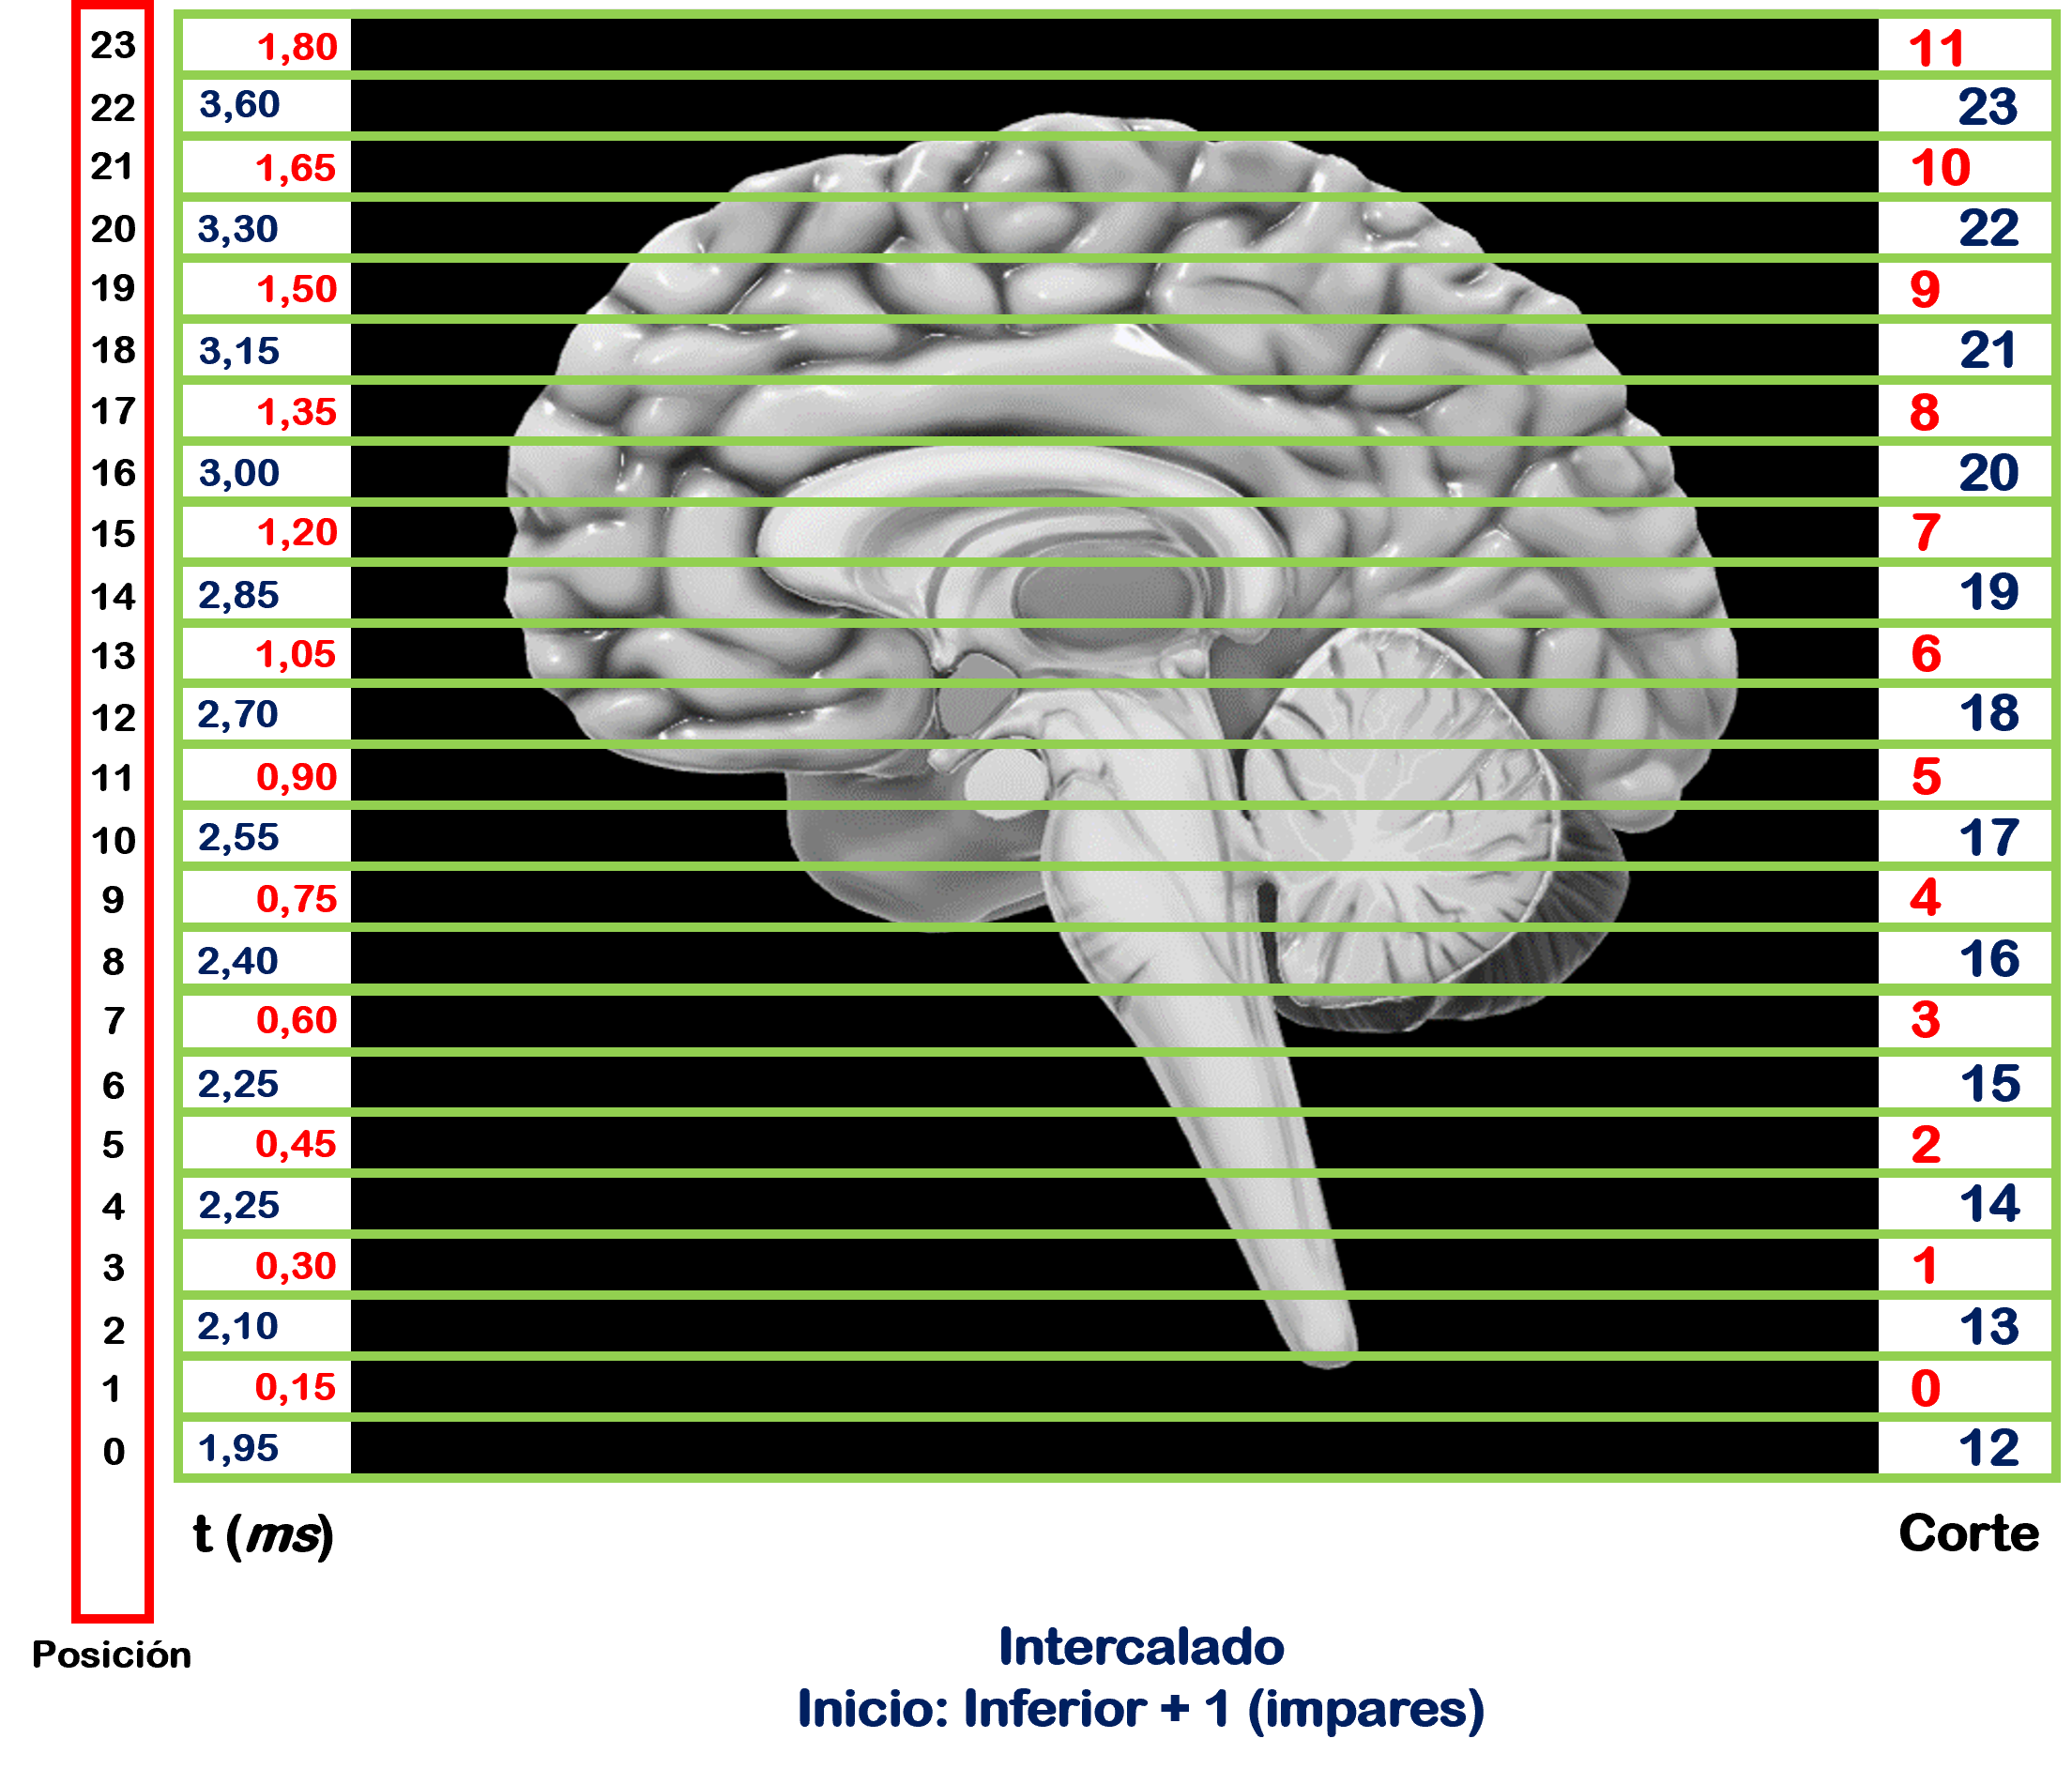

IRMf Siemens
Manufacturer                                                            Siemens
ManufacturersModelName                                                    Skyra
EchoTrainLength                                                              32
AcquisitionNumber                                                             1
InstitutionName                   Princeton_University_-_Neuroscience_Institute
InstitutionAddress            Washington_and_Faculty_Rd._-_Building_25_25_Pr...
DeviceSerialNumber                                                        45031
SoftwareVersions                                                   syngo_MR_D11
ProcedureStepDescription                                         NormanLab_Anna
ScanningSequence                                                             EP
SequenceVariant                                                              SK
SeriesDescription                                              epi_195_3x3x3_2s
BodyPartExamined                                                           HEAD
ProtocolName                                                   epi_195_3x3x3_2s
SequenceName                                                       _epfid2d1_64
ImageType                     ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM', 'MO...
AcquisitionTime                                                 22:00:42.805000
MagneticFieldStrength                                                         3
FlipAngle                                                                    71
EchoTime                                                                   0.03
RepetitionTime                                                                2
PhaseEncodingLines                                                           64
BandwidthPerPixelPhaseEncode                                             47.348
EffectiveEchoSpacing                                                    0.00033
TotalReadoutTime                                                        0.02046
AccelFactPE                                                                   2
TrueEchoSpacing                                                         0.00066
SliceTiming                   [1, 0, 1.055, 0.055, 1.11, 0.11, 1.165, 0.165,...
PhaseEncodingDirection                                                       j-
ConversionSoftware                                                     dcm2niix
ConversionSoftwareVersion               v1.0.20170724 (OpenJPEG build) GCC6.1.0

-----------------------------------------------------------------------------------------------------------------

Imagen del estudio ds002422_fisiologica
Orden de adquisición de cortes intercalados inferior+1/impares: 

[1.5375, 0, 1.6225, 0.085, 1.7075, 0.1725, 1.7925, 0.2575, 1.8775, 0.3425, 1.9625, 0.4275, 2.05, 0.5125, 2.135, 0.5975, 2.22, 0.6825, 2.305, 0.77, 2.39, 0.855, 2.475, 0.94, 2.56, 1.025, 2.6475, 1.11, 2.7325, 1.195, 2.8175, 1.28, 2.9025, 1.3675, 2.9875, 1.4525]

Tiempo de repetición (TR)=  3.56

Número de cortes =  36


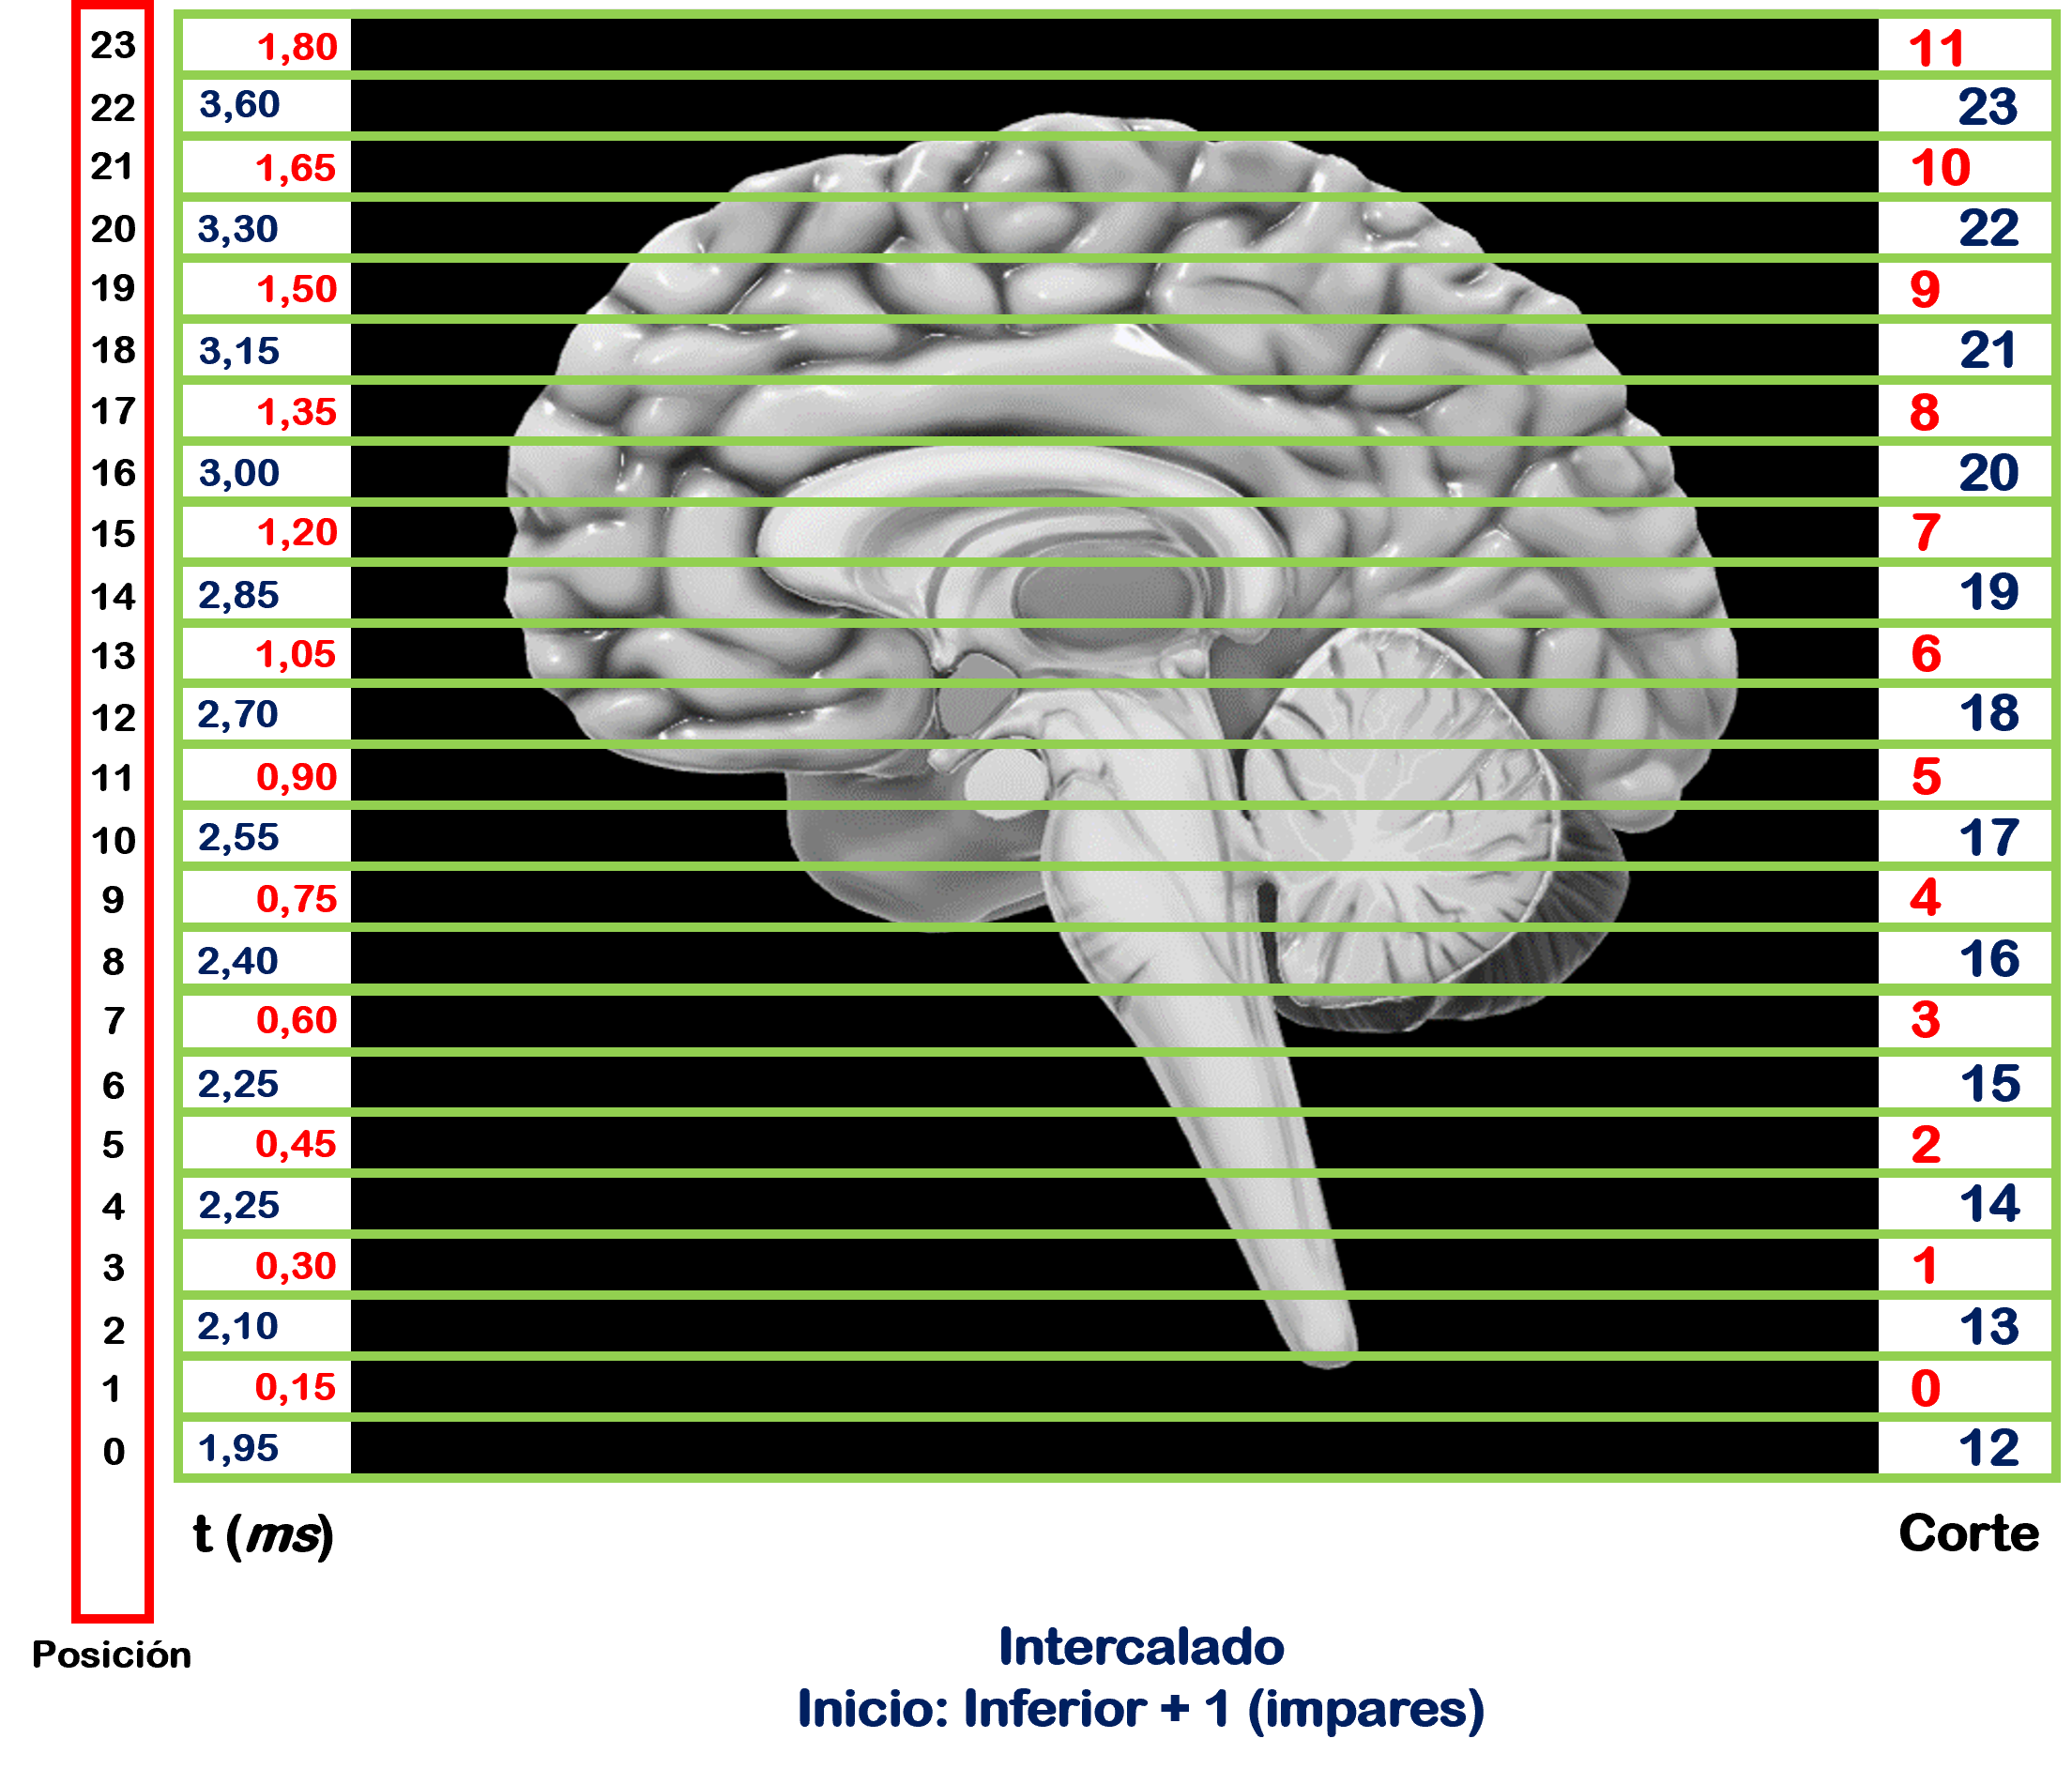

IRMf rest
TaskName                                                                         rest
MagneticFieldStrength                                                             1.5
Manufacturer                                                                  Siemens
ManufacturersModelName                                                         Avanto
BodyPartExamined                                                                 HEAD
PatientPosition                                                                   HFS
ProcedureStepDescription                                                   head_NEURO
SoftwareVersions                                                         syngo_MR_B19
MRAcquisitionType                                                                  2D
ScanningSequence                                                                   EP
SequenceVariant                                                                    SK
ScanOptions                                                                        FS
SequenceName                                                             _epfid2d1_64
ImageType                           ['ORIGINAL', 'PRIMARY', 'FMRI', 'NONE', 'ND', ...
SliceThickness                                                                    3.6
SpacingBetweenSlices                                                             3.78
EchoTime                                                                         0.05
RepetitionTime                                                                   3.56
FlipAngle                                                                          90
PartialFourier                                                                      1
BaseResolution                                                                     64
DelayTime                                                                         0.5
PhaseResolution                                                                     1
ReceiveCoilName                                                            HeadMatrix
PulseSequenceDetails                                           %SiemensSeq%_ep2d_bold
PercentPhaseFOV                                                                   100
PhaseEncodingSteps                                                                 64
AcquisitionMatrixPE                                                                64
ReconMatrixPE                                                                      64
BandwidthPerPixelPhaseEncode                                                   34.722
EffectiveEchoSpacing                                                          0.00045
DerivedVendorReportedEchoSpacing                                              0.00045
TotalReadoutTime                                                              0.02835
PixelBandwidth                                                                   2604
DwellTime                                                                    0.000003
PhaseEncodingDirection                                                             j-
SliceTiming                         [1.5375, 0, 1.6225, 0.085, 1.7075, 0.1725, 1.7...
InPlanePhaseEncodingDirectionDICOM                                                COL
NumberOfVolumesDiscardedByUser                                                      3
Instructions                        Participants were asked to close their eyes, t...

-----------------------------------------------------------------------------------------------------------------

Imagen del estudio ds004101_fisiologica
Orden de adquisición de cortes intercalados inferior+1/impares: 

[1.205, 0, 1.2725, 0.0675, 1.3375, 0.135, 1.405, 0.2, 1.4725, 0.2675, 1.54, 0.335, 1.605, 0.4025, 1.6725, 0.4675, 1.74, 0.535, 1.8075, 0.6025, 1.875, 0.67, 1.94, 0.7375, 2.0075, 0.8025, 2.075, 0.87, 2.1425, 0.9375, 2.2075, 1.005, 2.275, 1.07, 2.3425, 1.1375]

Tiempo de repetición (TR)=  2.4

Número de cortes =  36


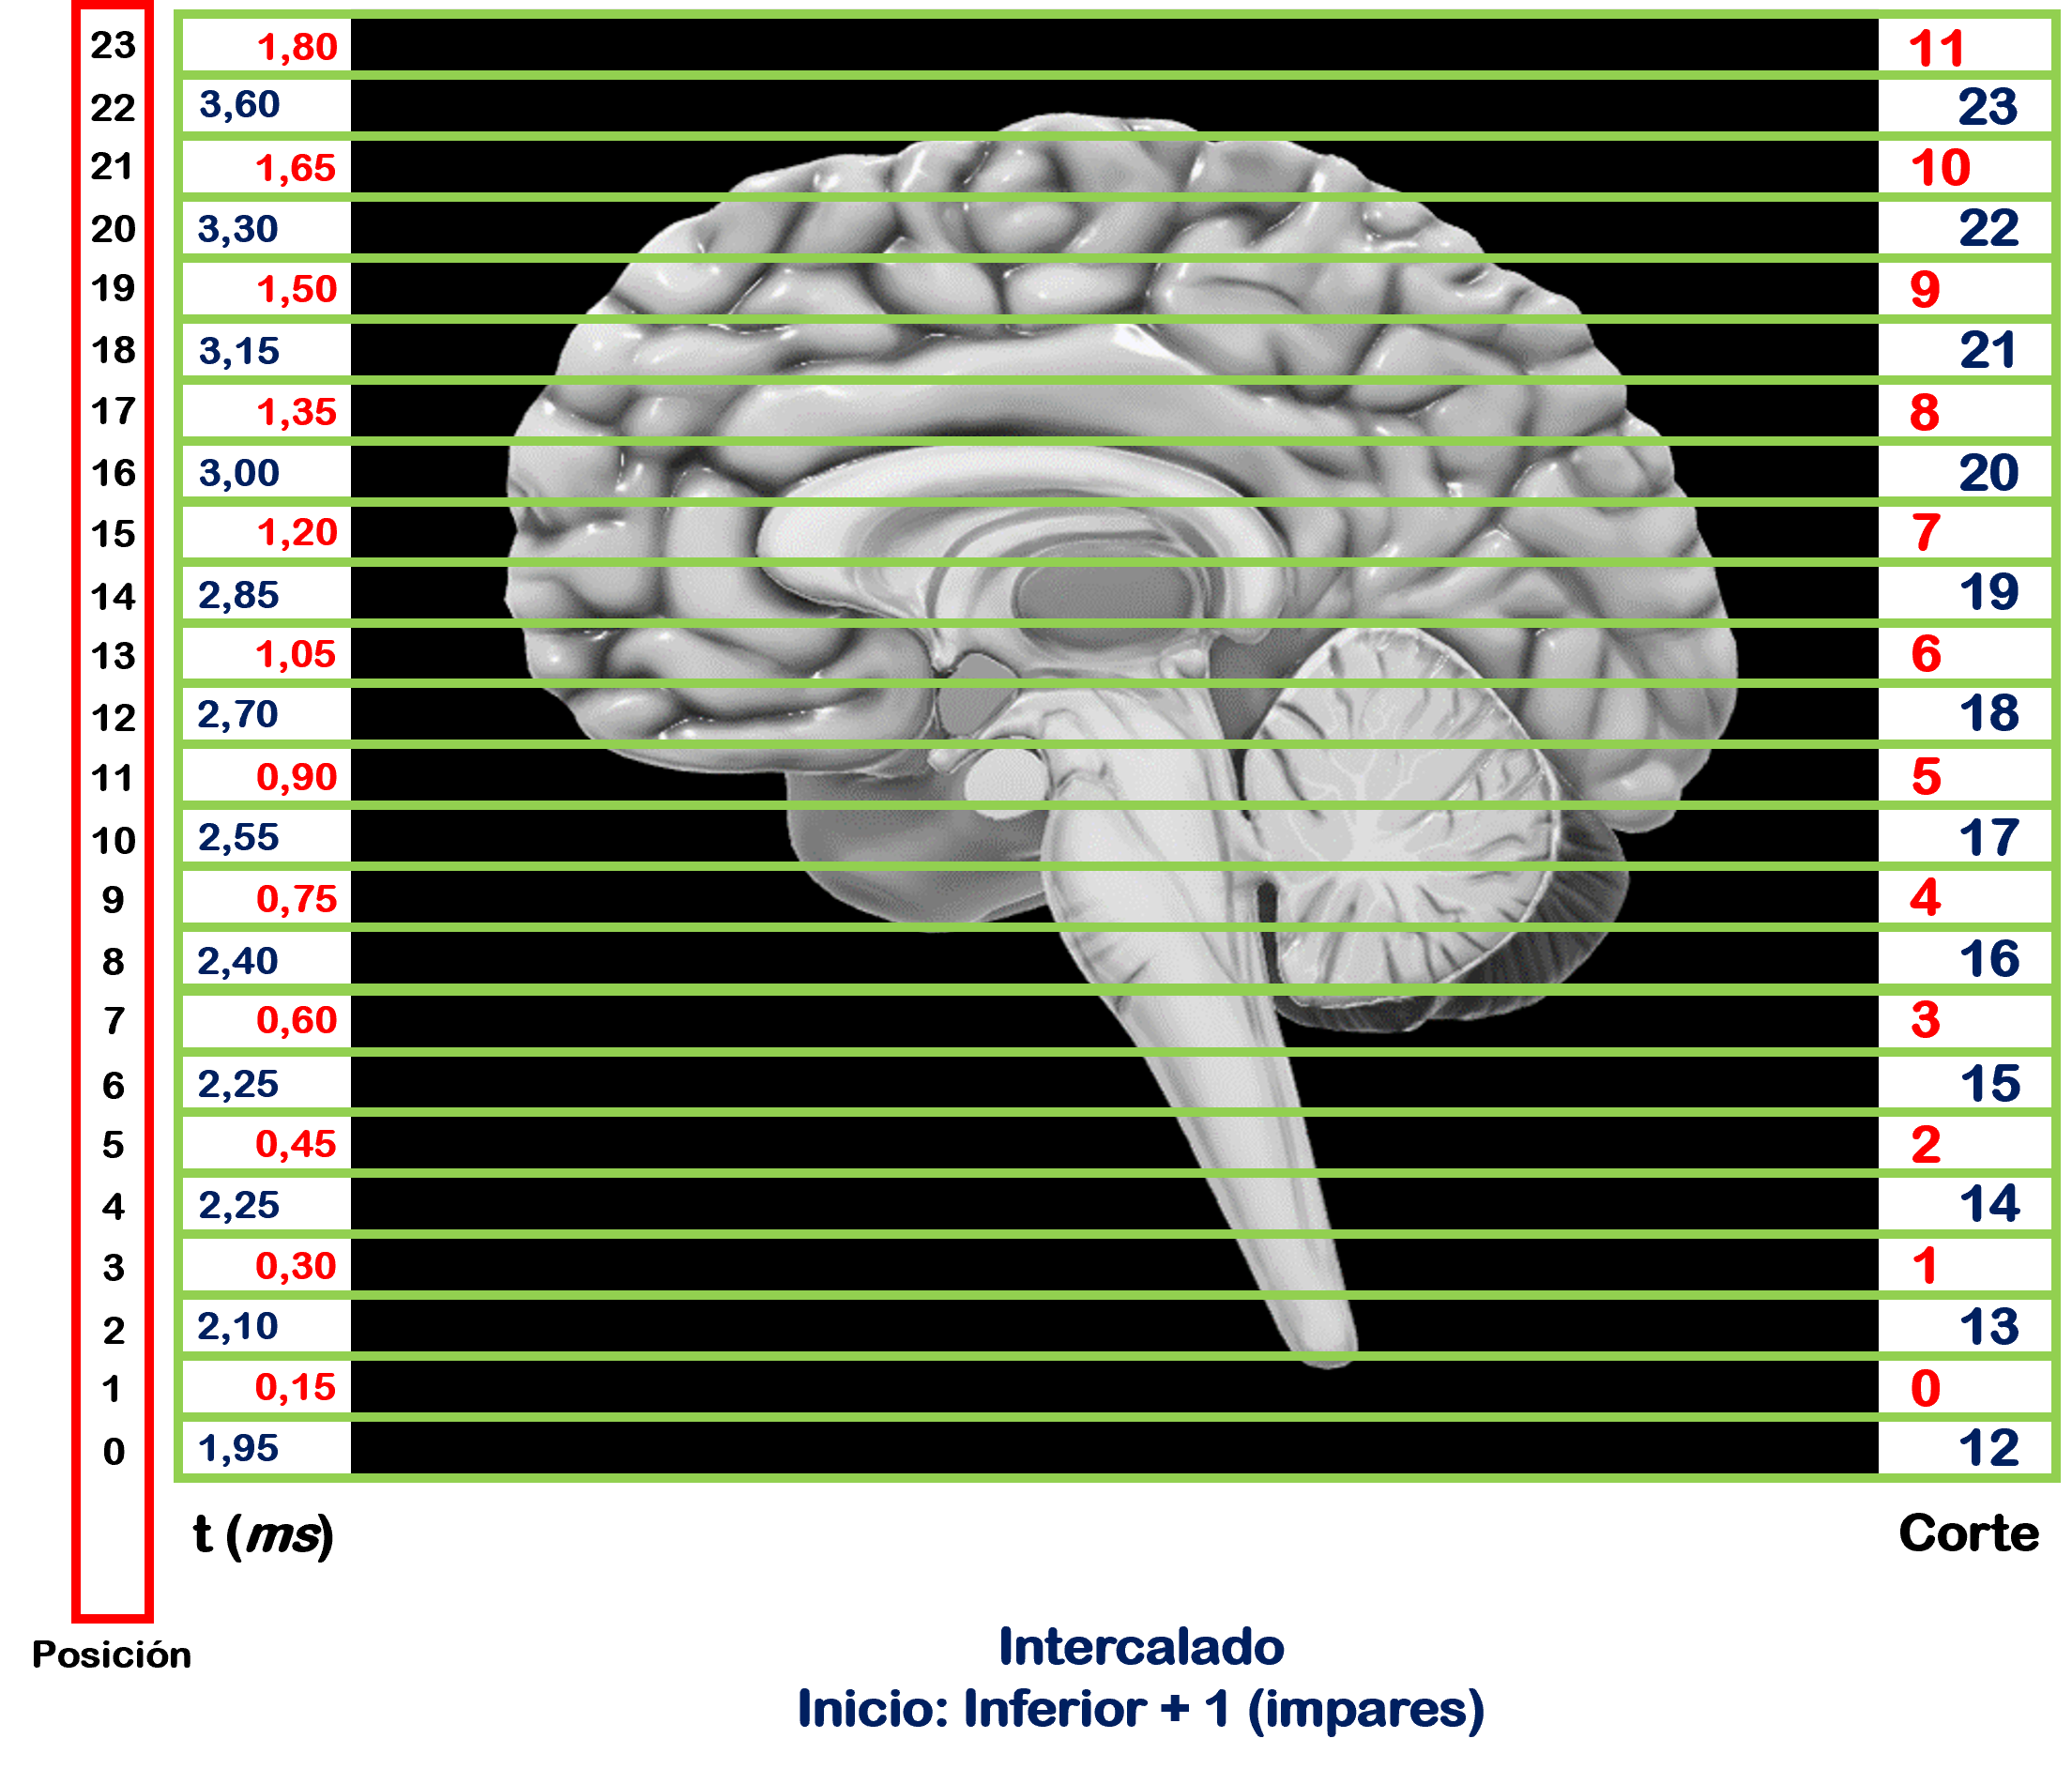

IRMf rest
TaskName                                                                         rest
MagneticFieldStrength                                                               3
Manufacturer                                                                  Siemens
ManufacturersModelName                                                          Verio
BodyPartExamined                                                                 HEAD
PatientPosition                                                                   HFS
MRAcquisitionType                                                                  2D
ScanningSequence                                                                   EP
SequenceVariant                                                                    SK
ScanOptions                                                                        FS
ImageType                                ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC']
SliceThickness                                                                      3
SpacingBetweenSlices                                                             3.75
EchoTime                                                                         0.03
RepetitionTime                                                                    2.4
FlipAngle                                                                          90
PercentPhaseFOV                                                                   100
PhaseEncodingSteps                                                                 64
AcquisitionMatrixPE                                                                64
ReconMatrixPE                                                                      64
EffectiveEchoSpacing                                                          0.00051
TotalReadoutTime                                                              0.03213
PhaseEncodingDirection                                                              i
SliceTiming                         [1.205, 0, 1.2725, 0.0675, 1.3375, 0.135, 1.40...
InPlanePhaseEncodingDirectionDICOM                                                ROW
Instructions                        Lie still with eyes closed, don't keep yoursel...

In [7]:
for i, imjs in enumerate(archivos_json):
    print('---------------------------------------------------------'+
          '--------------------------------------------------------\n')
    print('Imagen del estudio '+imjs)
    datos_json_img = order_slice(json_arch= archivos_json[imjs])
    print('\nTiempo de repetición (TR)= ', datos_json_img[1])
    print('\nNúmero de cortes = ', datos_json_img[2])
    display(Image(datos_json_img[4], width=450, height=450))
    display(datos_json_img[3])

# Tiempo de ejecución

In [8]:
fin = time.time()
end = time.process_time()
tiempo = fin - inicio
tiempo2 = end - start

print('--------------------------------------')
print('tiempo de ejecución\n\n', round(tiempo,3), 'seg\n', round(tiempo/60,3), 'min')     
print('--------------------------------------')
print('tiempo de ejecución del sistema y CPU\n\n', round(tiempo2,3), 'seg\n', round(tiempo2/60,3), 'min')
print('--------------------------------------')

--------------------------------------
tiempo de ejecución

 0.888 seg
 0.015 min
--------------------------------------
tiempo de ejecución del sistema y CPU

 1.023 seg
 0.017 min
--------------------------------------


# Fin